## Alicia Chon's Final Project 

### Import Modules

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import sklearn as sk
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(style='white', context='notebook', palette='deep') 
import matplotlib.style as style
style.use('fivethirtyeight')
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV

# Data Scaler
from sklearn.preprocessing import StandardScaler

# Regression
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet

# Metrics
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [3]:
df = pd.read_csv('nyc-rolling-sales.csv')
print(len(df))
df.head(10)

84548


,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
5,9,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,,C4,516 EAST 12TH STREET,...,20,0,20,2581,9730,1900,2,C4,-,2017-07-20 00:00:00
6,10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,...,8,0,8,1750,4226,1920,2,C4,3192840,2016-09-23 00:00:00
7,11,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,407,18,,C7,520 EAST 14TH STREET,...,44,2,46,5163,21007,1900,2,C7,-,2017-07-20 00:00:00
8,12,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,379,34,,D5,141 AVENUE D,...,15,0,15,1534,9198,1920,2,D5,-,2017-06-20 00:00:00
9,13,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,...,24,0,24,4489,18523,1920,2,D9,16232000,2016-11-07 00:00:00


#### First I will rename the boroughs which are numerical to the actual name, as defined in kaggle.

In [4]:
df['BOROUGH'][df['BOROUGH'] == 1] = 'Manhattan'
df['BOROUGH'][df['BOROUGH'] == 2] = 'Bronx'
df['BOROUGH'][df['BOROUGH'] == 3] = 'Brooklyn'
df['BOROUGH'][df['BOROUGH'] == 4] = 'Queens'
df['BOROUGH'][df['BOROUGH'] == 5] = 'Staten Island'

### Initial Observations

In [5]:
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


#### From analyzing the data, you can see that there are two columns with no values, Ease-Ment and Unnamed:0. I am going to remove these columns.

In [6]:
del df['EASE-MENT']

In [7]:
del df['Unnamed: 0']

In [8]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 20 columns):
BOROUGH                           84548 non-null object
NEIGHBORHOOD                      84548 non-null object
BUILDING CLASS CATEGORY           84548 non-null object
TAX CLASS AT PRESENT              84548 non-null object
BLOCK                             84548 non-null int64
LOT                               84548 non-null int64
BUILDING CLASS AT PRESENT         84548 non-null object
ADDRESS                           84548 non-null object
APARTMENT NUMBER                  84548 non-null object
ZIP CODE                          84548 non-null int64
RESIDENTIAL UNITS                 84548 non-null int64
COMMERCIAL UNITS                  84548 non-null int64
TOTAL UNITS                       84548 non-null int64
LAND SQUARE FEET                  84548 non-null object
GROSS SQUARE FEET                 84548 non-null object
YEAR BUILT                        84548 non-null int64
TA

##### Additional observations: Land and gross square feet should be numeric but both are objects. Sale price is an object but it should be numeric. Sale date should be date-time.

In [10]:
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')
df['LAND SQUARE FEET'] = pd.to_numeric(df['LAND SQUARE FEET'], errors='coerce')
df['GROSS SQUARE FEET']= pd.to_numeric(df['GROSS SQUARE FEET'], errors='coerce')
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce')

#### The tax class at time of sale and tax class at present are object but they should be categorical.

In [11]:
df['TAX CLASS AT TIME OF SALE'] = df['TAX CLASS AT TIME OF SALE'].astype('category')
df['TAX CLASS AT PRESENT'] = df['TAX CLASS AT PRESENT'].astype('category')

In [12]:
df.shape

(84548, 20)

In [13]:
### Checking missing values by graphing and making the data into a %

In [14]:
variables = df.columns
count = []

for variable in variables:
    length = df[variable].count()
    count.append(length)
count_pct = np.round(100 * pd.Series(count) / len(df), 2)   


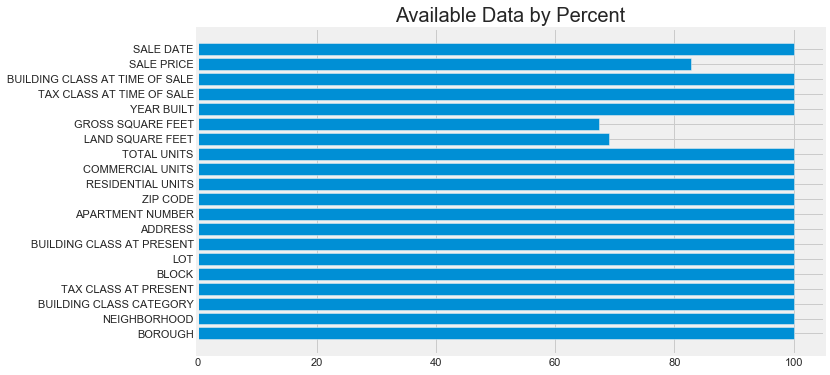

In [15]:
plt.figure(figsize=(10,6))
plt.barh(variables, count_pct)
plt.title('Available Data by Percent', fontsize=20)
plt.show()

#### Observation: 25% of gross and land square feet is null/missing, while 20% of sale price data is null. Since I am trying to predict the sales price data, I want to remove the null values.

In [16]:
df = df[df['SALE PRICE'].notnull()]
len(df)

69987

In [17]:
df.describe()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,69987.000000,69987.000000,69987.000000,69987.000000,69987.000000,69987.000000,4.879900e+04,4.824800e+04,69987.000000,6.998700e+04
mean,4196.072528,373.828397,10741.455185,1.899553,0.172489,2.092203,3.629395e+03,3.672552e+03,1799.348236,1.276456e+06
std,3429.196524,656.096528,1263.234938,14.549545,9.123717,17.276100,4.035784e+04,2.947540e+04,520.884552,1.140526e+07
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,1348.000000,22.000000,10306.000000,0.000000,0.000000,0.000000,1.438000e+03,8.280000e+02,1920.000000,2.250000e+05
50%,3378.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,2.150000e+03,1.620000e+03,1937.000000,5.300000e+05
75%,6186.000000,709.000000,11249.000000,2.000000,0.000000,2.000000,3.100000e+03,2.520000e+03,1965.000000,9.500000e+05
max,16319.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2017.000000,2.210000e+09


#### Initial observations:
1) There are probably some incorrect zipcode values since there are values of 0.

2) Buildings were built in year 0 and properties were built with $0 sales price, which is likely incorrect.

3) Most properties have no commercial units.

3) At least half of the properties have only 1 total unit. I am not quite sure what to make of that yet.

### I am going to now start looking at the sales price, which is the variable that I want to predict.

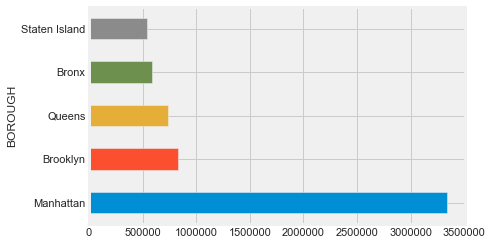

In [18]:
to_plot = df.groupby('BOROUGH').mean()['SALE PRICE'].sort_values(ascending=False)
to_plot.head()

to_plot.head().plot(kind='barh')

#### Observation: Manhattan has the most expensive units. 
##### Most of the units are over 500K on average, and Manhattan's average is a little under 3.5mil.

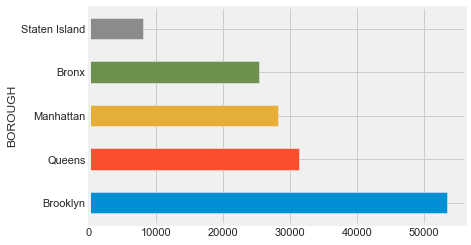

In [19]:
to_plot = df.groupby('BOROUGH')['TOTAL UNITS'].sum().sort_values(ascending=False)
to_plot.head()

to_plot.head().plot(kind='barh')

#### Brooklyn has the most units of the five boroughs.

### To further clean the data, I will remove all null values of gross and and land square feet and all outliers.

In [20]:
df = df[df['LAND SQUARE FEET'].notnull() < 20000] 
df = df[df['GROSS SQUARE FEET'].notnull() < 20000] 

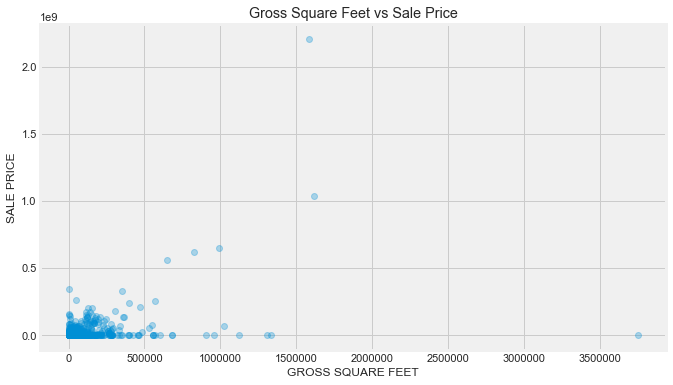

In [21]:
plt.figure(figsize=(10,6))
sns.regplot(x='GROSS SQUARE FEET', y='SALE PRICE', data = df, fit_reg=False, scatter_kws={'alpha':0.3})
plt.title('Gross Square Feet vs Sale Price')
plt.show()

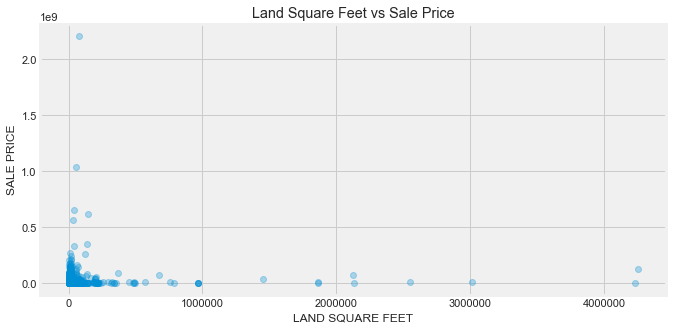

In [22]:
plt.figure(figsize=(10,5))
sns.regplot(x='LAND SQUARE FEET', y='SALE PRICE', data=df, fit_reg=False, scatter_kws={'alpha':0.3})
plt.title('Land Square Feet vs Sale Price')
plt.show()

### Total units should be equaled to the commercial units and residential units, so we will remove all units that do not follow this logic. 

In [23]:
df = df[df['TOTAL UNITS'] == df['COMMERCIAL UNITS'] + df['RESIDENTIAL UNITS']]

In [24]:
df = df[(df['TOTAL UNITS'] > 0) & (df['TOTAL UNITS'] < 50)] 

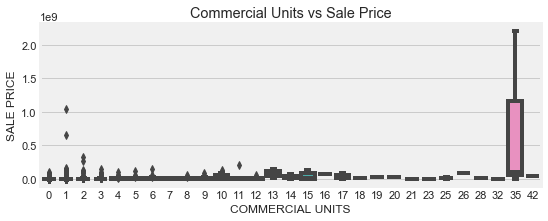

In [25]:
plt.figure(figsize=(8,3))
sns.boxplot(x='COMMERCIAL UNITS', y='SALE PRICE', data=df)
plt.title('Commercial Units vs Sale Price')
plt.show()

In [26]:
df = df[df['YEAR BUILT'] > 0]

In [27]:
df = df[(df['SALE PRICE'] > 100000) & (df['SALE PRICE'] < 5000000)]

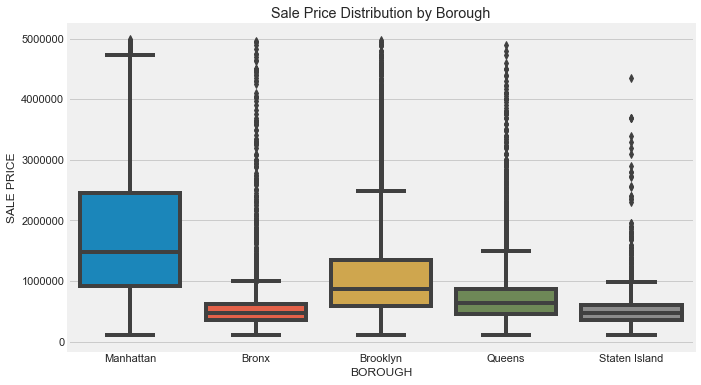

In [28]:
plt.figure(figsize=(10,6))
sns.boxplot(x='BOROUGH', y='SALE PRICE', data=df)
plt.title('Sale Price Distribution by Borough')
plt.show()

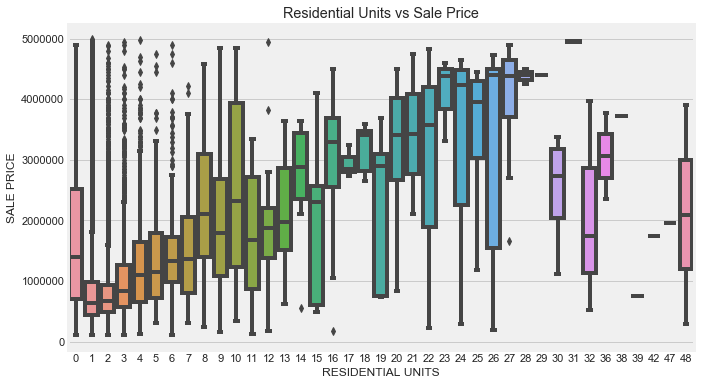

In [29]:
plt.figure(figsize=(10,6))
sns.boxplot(x='RESIDENTIAL UNITS', y='SALE PRICE', data=df)
plt.title('Residential Units vs Sale Price')
plt.show()

In [30]:
df['AGE OF BUILDING'] = 2017 - df['YEAR BUILT']

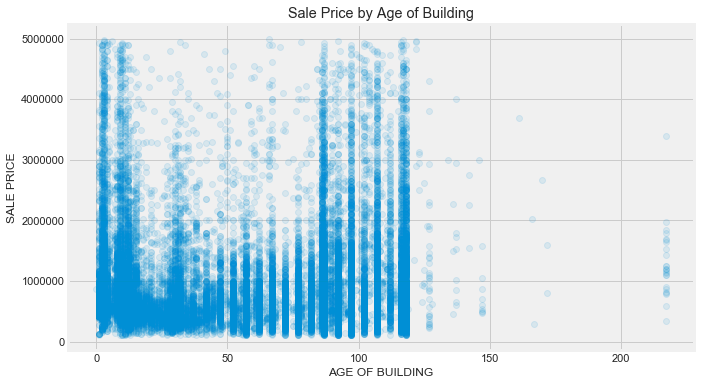

In [31]:
plt.figure(figsize=(10,6))
sns.regplot(x='AGE OF BUILDING', y='SALE PRICE', data=df, fit_reg=False, scatter_kws={'alpha':0.1})
plt.title('Sale Price by Age of Building')
plt.show()

### Normalize and standardize the data

In [32]:
columns = ['BOROUGH', 'COMMERCIAL UNITS','GROSS SQUARE FEET',
       'SALE PRICE', 'YEAR', 'LAND SQUARE FEET', 'RESIDENTIAL UNITS']
df_model = df.loc[:,columns]

In [33]:
select_features = ['BOROUGH', 'GROSS SQUARE FEET']

# For each categorical column, we need to find the unique number of categories to determine how many columns to add
longest_str = max(select_features, key=len)
total_num_unique_categorical = 0
for feature in select_features:
    num_unique = len(df[feature].unique())
    print('{col:<{fill_col}} : {num:d} unique categorical values.'.format(col=feature, 
                                                                          fill_col=len(longest_str),
                                                                          num=num_unique))
    total_num_unique_categorical += num_unique
print('{total:d} columns will be added during one-hot encoding.'.format(total=total_num_unique_categorical))

BOROUGH           : 5 unique categorical values.
GROSS SQUARE FEET : 3602 unique categorical values.
3607 columns will be added during one-hot encoding.


In [34]:
# Convert categorical variables into dummy variables
select_features_dummy = pd.get_dummies(df_model[select_features])
select_features_dummy.info(verbose=True, memory_usage=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36297 entries, 3 to 84545
Data columns (total 6 columns):
GROSS SQUARE FEET        29839 non-null float64
BOROUGH_Bronx            36297 non-null uint8
BOROUGH_Brooklyn         36297 non-null uint8
BOROUGH_Manhattan        36297 non-null uint8
BOROUGH_Queens           36297 non-null uint8
BOROUGH_Staten Island    36297 non-null uint8
dtypes: float64(1), uint8(5)
memory usage: 2.0 MB


In [35]:
df_model = df_model.drop(select_features, axis=1)

# add the new dummy variables
df_model = pd.concat([df_model, select_features_dummy], axis=1)
df_model.head()

,COMMERCIAL UNITS,SALE PRICE,YEAR,LAND SQUARE FEET,RESIDENTIAL UNITS,GROSS SQUARE FEET,BOROUGH_Bronx,BOROUGH_Brooklyn,BOROUGH_Manhattan,BOROUGH_Queens,BOROUGH_Staten Island
3,0,3936272.0,NaN,2272.0,10,6794.0,0,0,1,0,0
6,0,3192840.0,NaN,1750.0,8,4226.0,0,0,1,0,0
79,0,762669.0,NaN,NaN,1,NaN,0,0,1,0,0
80,0,772851.0,NaN,NaN,1,NaN,0,0,1,0,0
81,0,1034880.0,NaN,NaN,1,NaN,0,0,1,0,0


### Comparing the Sales Price variable Pre-normalization

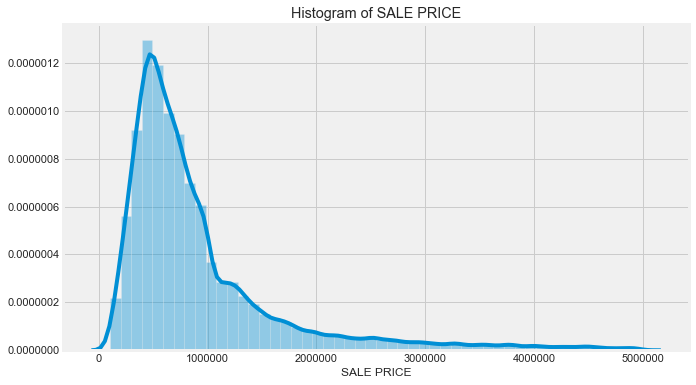

In [36]:
plt.figure(figsize=(10,6))
sns.distplot(df_model['SALE PRICE'])
plt.title('Histogram of SALE PRICE')
plt.show()

In [37]:
np.log(df_model['SALE PRICE'])

3        15.185745
6        14.976421
79       13.544579
80       13.557842
81       13.849796
85       13.592367
86       14.646574
95       13.460749
100      13.532379
104      13.556714
112      14.036537
116      14.580978
122      13.721200
123      13.721200
124      13.500800
125      13.493927
127      14.077875
128      13.554146
129      14.375126
133      14.334371
134      13.955273
135      14.084355
136      14.437912
137      14.287851
138      14.393212
139      14.034646
140      13.997832
141      14.457364
142      13.955273
143      14.403297
           ...    
84503    13.924365
84508    13.552846
84510    13.296317
84511    13.005830
84512    13.573439
84514    13.253392
84516    13.489780
84517    13.208541
84518    13.681979
84519    13.681979
84520    13.641157
84521    13.557387
84522    13.514405
84526    13.287878
84527    13.270783
84528    13.217674
84529    13.208541
84530    13.592367
84531    13.373122
84532    12.919248
84533    13.304685
84534    13.

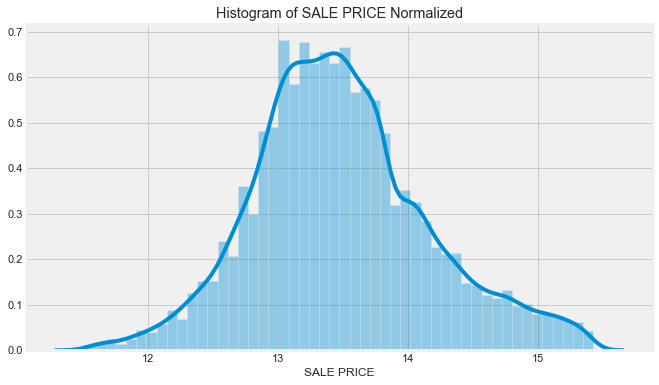

In [38]:
plt.figure(figsize=(10,6))
sns.distplot(np.log(df_model['SALE PRICE']))
plt.title('Histogram of SALE PRICE Normalized')
plt.show()

### Train Test Split

In [39]:
df = df[df['LAND SQUARE FEET'].notnull()]
df = df[df['GROSS SQUARE FEET'].notnull()]

In [40]:
df['LAND SQUARE FEET'].isnull().sum()

0

In [41]:
#Make sales price into binary based on whether > 1mil 
df['OVER500K'] = (df.loc[:, 'SALE PRICE'] > 500000).astype(int)
df.head()
df.to_csv('df.csv')

In [42]:
from sklearn.model_selection import train_test_split
#Define X and y
X = df[['YEAR BUILT', 'LAND SQUARE FEET', 'GROSS SQUARE FEET'
          ]] #features we think may help predict y
y = df['OVER500K'] #what we want to predict

X_tr, X_te, y_tr, y_te = train_test_split(X, y, random_state = 0)
#A brief preview of our train test split
print(len(X_tr), len(X_te), len(y_tr), len(y_te))

22378 7460 22378 7460


### Logistic Regression

In [43]:
import pandas as pd
import numpy as np
import warnings

from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

from plotnine import *
%matplotlib inline



In [55]:
params = {
   'C': [0.1, 1, 10, 100]
}
regression = LogisticRegression()
grid_logit = GridSearchCV(estimator=regression, param_grid=params, verbose=1)
grid_logit.fit(X_tr, y_tr)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.3s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=1)

In [56]:
print(grid_logit.best_score_)

0.6619000804361427


In [44]:
%%time
params = {
    'C': np.logspace(-2, 2, num=10)
}

mod = LogisticRegression(multi_class='multinomial', solver='lbfgs')
gscv = GridSearchCV(mod, params, cv=5, refit=True, return_train_score=True)
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    gscv.fit(X_tr, y_tr)

Wall time: 7.18 s


In [54]:
def plot_confusion_matrix(cm, normalize=True, digits=4):
    plt_df = (pd.DataFrame(cm)
              .reset_index()
              .melt(id_vars='index')
              .assign(index = lambda d: pd.Categorical(d['index'], d['index'].unique()[::-1], ordered=True),
                      variable = lambda d: pd.Categorical(d['variable'], d['variable'].unique(), ordered=True))
              .rename(columns={'index':'true label', 'variable':'predicted label'})
             )
    
    if normalize:
        plt_df = (plt_df
                  .assign(true_total = lambda d: d.groupby('true label')['value'].transform(lambda x: x.sum()))
                  .assign(value = lambda d: (d['value'] / d['true_total']).round(digits))
                 )
        
    plt = (ggplot(plt_df, aes(x='predicted label', y='true label'))
            + geom_tile(aes(fill='value')) 
            + geom_text(aes(label='value'))
            + theme_minimal()
            + scale_fill_gradient(low = "snow", high = "steelblue")
            + theme(legend_title=element_blank())
           )
    
    return plt

In [46]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.25, random_state=0)

In [47]:
%%time
params = {
    'C': np.logspace(-2, 2, num=10)
}

mod = LogisticRegression(multi_class='multinomial', solver='lbfgs')
gscv = GridSearchCV(mod, params, cv=5, refit=True, return_train_score=True)
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    gscv.fit(X_tr, y_tr)

Wall time: 6.09 s


In [48]:
print(gscv.best_estimator_)
cv_results = pd.DataFrame(gscv.cv_results_)
print('Train score:', cv_results.loc[lambda d: d['rank_test_score'] == 1, 'mean_train_score'].values[0])
print('Test score:', cv_results.loc[lambda d: d['rank_test_score'] == 1, 'mean_test_score'].values[0])

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)
Train score: 0.6619671428299693
Test score: 0.6618553936902315


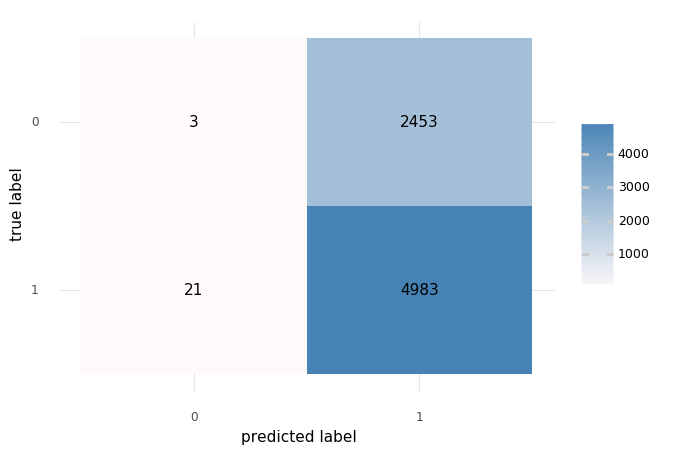

<ggplot: (-9223371927178095430)>

In [49]:
pred = gscv.best_estimator_.predict(X_te)
cm = confusion_matrix(y_te, pred)
plot_confusion_matrix(cm, normalize=False)

### Gradient Boosting

In [59]:
%%time
params = { 
    'n_estimators': [50, 100],
    'subsample': [0.25, 0.50],
    'max_depth' : [2, 4],
    'min_samples_split': [50, 100],
    'min_samples_leaf': [50, 100]
}

mod = GradientBoostingClassifier()
gscv = GridSearchCV(mod, params, cv=5, refit=True, return_train_score=True)
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    gscv.fit(X_tr, y_tr)

Wall time: 1min 38s


In [61]:
print(gscv.best_estimator_)
print(gscv.best_score_)
pd.DataFrame(gscv.cv_results_)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=50, min_samples_split=50,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=0.25, verbose=0,
              warm_start=False)
0.738627223165609


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,param_subsample,params,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.351054,0.067408,0.006197,0.002620,2,50,50,50,0.25,"{'max_depth': 2, 'min_samples_leaf': 50, 'min_...",...,0.723032,0.005631,32,0.724149,0.727516,0.727420,0.728034,0.722616,0.725947,0.002159
1,0.399539,0.058486,0.005974,0.000632,2,50,50,50,0.5,"{'max_depth': 2, 'min_samples_leaf': 50, 'min_...",...,0.723791,0.006583,28,0.727445,0.726734,0.726526,0.729543,0.725018,0.727053,0.001475
2,0.570487,0.055038,0.007167,0.000403,2,50,50,100,0.25,"{'max_depth': 2, 'min_samples_leaf': 50, 'min_...",...,0.731522,0.005075,23,0.736104,0.735784,0.733285,0.737865,0.732726,0.735153,0.001899
3,0.768738,0.133344,0.007589,0.002234,2,50,50,100,0.5,"{'max_depth': 2, 'min_samples_leaf': 50, 'min_...",...,0.732326,0.005254,18,0.733925,0.735449,0.734458,0.740211,0.733285,0.735466,0.002476
4,0.252929,0.004953,0.003990,0.000001,2,50,100,50,0.25,"{'max_depth': 2, 'min_samples_leaf': 50, 'min_...",...,0.723076,0.006677,31,0.725434,0.725897,0.725856,0.728425,0.726079,0.726338,0.001065
5,0.301001,0.007111,0.004182,0.000386,2,50,100,50,0.5,"{'max_depth': 2, 'min_samples_leaf': 50, 'min_...",...,0.724104,0.005498,27,0.728563,0.726288,0.726079,0.727476,0.723287,0.726338,0.001768
6,0.494682,0.003040,0.006990,0.001087,2,50,100,100,0.25,"{'max_depth': 2, 'min_samples_leaf': 50, 'min_...",...,0.732148,0.005633,20,0.733311,0.737627,0.734290,0.739038,0.733285,0.735510,0.002375
7,0.673978,0.085349,0.007380,0.001352,2,50,100,100,0.5,"{'max_depth': 2, 'min_samples_leaf': 50, 'min_...",...,0.731611,0.005345,22,0.733423,0.733884,0.736357,0.736804,0.730380,0.734170,0.002312
8,0.255330,0.007812,0.003790,0.000403,2,100,50,50,0.25,"{'max_depth': 2, 'min_samples_leaf': 100, 'min...",...,0.723434,0.005766,29,0.720574,0.724277,0.726247,0.727755,0.724906,0.724752,0.002407
9,0.291427,0.003304,0.003981,0.000013,2,100,50,50,0.5,"{'max_depth': 2, 'min_samples_leaf': 100, 'min...",...,0.724462,0.005878,25,0.724708,0.728690,0.725633,0.726806,0.724515,0.726070,0.001541


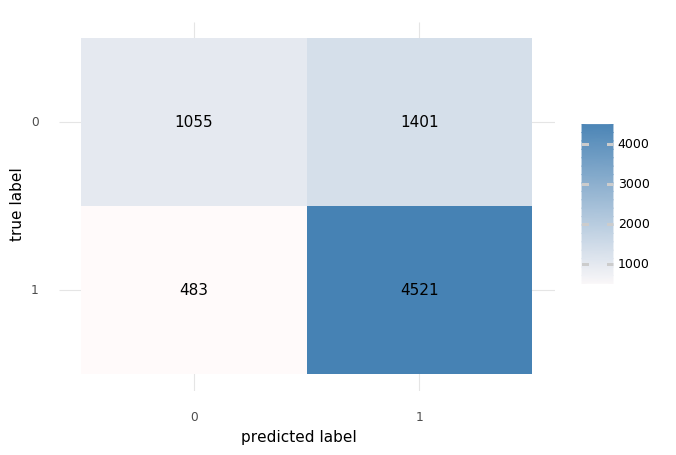

<ggplot: (-9223371927177085461)>

In [62]:
pred = gscv.best_estimator_.predict(X_te)
cm = confusion_matrix(y_te, pred)
plot_confusion_matrix(cm, normalize=False)

In [69]:
4521/(4521+483+1055+1401)

0.6060321715817695

##### The confusion matrix has strong prediction of the bottom right (true positive) section based on blue shading. There is a ~60% chance of a true positive to predict the sale price of buildings > 500K based on year built, gross square feet, and land square feet. The shading of top right corner suggests this model did not perform well.

##### Based on this model, the best variables are year built, land square feet, and gross square feet.